In [70]:
!pip install azure-storage-blob azure-identity


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import os, uuid
from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient


In [72]:
from azure.identity import DefaultAzureCredential


In [73]:
from azure.storage.blob import BlobClient

blob = BlobClient(account_url="https://dmsfall2022hana.blob.core.windows.net",
                  container_name="dmsfall2022project",
                  blob_name="kidney_disease.csv",
                  credential="m9BQXt4novVtmuLf/EKic0GJ8C+xgi2mSlQNjYowiW555+2v0h9oax24G7As4PO/yPmrwio6Sg06+AStgWKZYA==" )

with open("kidney_disease.csv", "wb") as f:
    data = blob.download_blob()
    data.readinto(f)

In [74]:
import pandas as pd
data_path = "kidney_disease.csv" 
df = pd.read_csv(data_path)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [22]:
#age - age
#bp - blood pressure
#sg - specific gravity
#al - albumin
#su - sugar
#rbc - red blood cells
#pc - pus cell
#pcc - pus cell clumps
#ba - bacteria
#bgr - blood glucose random
#bu - blood urea
#sc - serum creatinine
#sod - sodium
#pot - potassium
#hemo - hemoglobin
#pcv - packed cell volume
#wc - white blood cell count
#rc - red blood cell count
#htn - hypertension
#dm - diabetes mellitus
#cad - coronary artery disease
#appet - appetite
#pe - pedal edema
#ane - anemia
#class - class

In [75]:
df.isnull()
df=df.dropna()

In [76]:
import numpy as np
df['appet'].replace('good', 1 , inplace=True)
df['appet'].replace('poor', 0 , inplace=True)
df['appet'].replace('no', np.nan, inplace=True)
df['classification'].replace('ckd', 1, inplace=True)
df['classification'].replace('notckd', 0, inplace=True)
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,0,yes,yes,1
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,0,no,yes,1
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,0,yes,no,1
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,0,yes,no,1
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,0,yes,yes,1


In [77]:
df['rbc'].replace('abnormal', 1 , inplace=True)
df['pc'].replace('abnormal', 1 , inplace=True)
df['rbc'].replace('normal', 0 , inplace=True)
df['pc'].replace('normal', 0 , inplace=True)
df['pcc'].replace('present',1,inplace=True)
df['ba'].replace('present',1,inplace=True)
df['pcc'].replace('notpresent',0,inplace=True)
df['ba'].replace('notpresent',0,inplace=True)
df['htn'].replace('yes', 1 , inplace=True)
df['dm'].replace('yes', 1 , inplace=True)
df['cad'].replace('yes', 1 , inplace=True)
df['pe'].replace('yes', 1 , inplace=True)
df['ane'].replace('yes', 1 , inplace=True)
df['htn'].replace('no', 0 , inplace=True)
df['dm'].replace('no', 0 , inplace=True)
df['cad'].replace('no', 0 , inplace=True)
df['pe'].replace('no', 0 , inplace=True)
df['ane'].replace('no', 0 , inplace=True)

In [78]:
df.drop('id',axis=1,inplace=True)

In [79]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = df.drop('classification',axis=1)
Y = df['classification']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
avg_auc = cross_val_score(model, X_test, Y_test, cv=10, scoring="roc_auc").mean()
print(avg_auc)

1.0


In [104]:
from sklearn.metrics import accuracy_score
print ( "Accuracy = %.4f" % accuracy_score(model.predict(X_test), Y_test) )

Accuracy = 0.9688


AUC for DecisionTree = 1.000


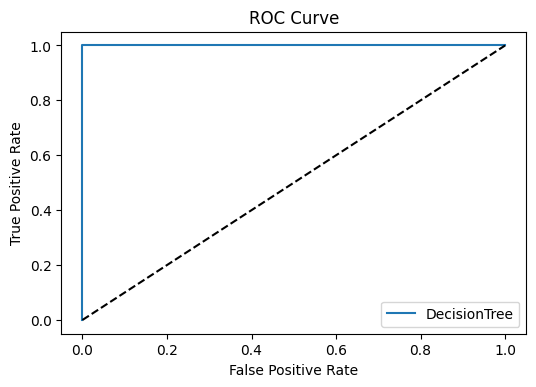

In [105]:
from sklearn import metrics
import matplotlib.pyplot as plt
def get_model_roc(models, Xs_test, names, Y_test):
    plt.rcParams['figure.dpi'] = 100
    for i in range(len(models)):
        model = models[i]
        X_test = Xs_test[i]
        name = names[i]
        probs = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs)
        plt.plot(fpr, tpr, label=name)
        plt.plot([0, 1], [0, 1], linestyle='dashed', color='black')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        print ("AUC for {0} = {1:.3f}".format(name, metrics.roc_auc_score(Y_test, probs)))
    plt.legend()
    plt.show()

get_model_roc([model], [X_test], ['DecisionTree'], Y_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41f86f3a30>,
      dtype=object)

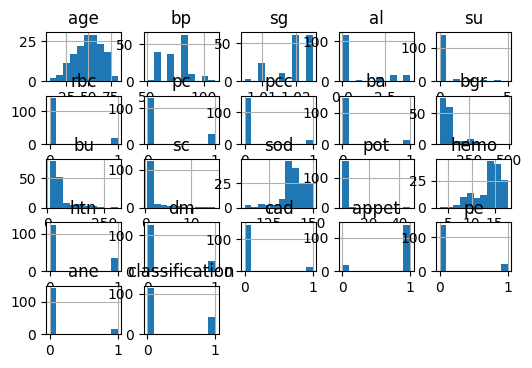

In [106]:
df.hist()

In [84]:
df2=df.corr()
print(df2)

                     age        bp        sg        al        su       rbc  \
age             1.000000  0.079712 -0.277303  0.253380  0.207711  0.147971   
bp              0.079712  1.000000 -0.198897  0.322507  0.243828  0.316670   
sg             -0.277303 -0.198897  1.000000 -0.712331 -0.448477 -0.500494   
al              0.253380  0.322507 -0.712331  1.000000  0.521448  0.489941   
su              0.207711  0.243828 -0.448477  0.521448  1.000000  0.256568   
rbc             0.147971  0.316670 -0.500494  0.489941  0.256568  1.000000   
pc              0.188907  0.179834 -0.630323  0.752956  0.335901  0.498959   
pcc             0.124032  0.206507 -0.460050  0.503341  0.177327  0.168592   
ba              0.068353  0.174555 -0.516392  0.516104  0.381929  0.273177   
bgr             0.301915  0.190113 -0.544781  0.518123  0.730050  0.493857   
bu              0.190636  0.316287 -0.545319  0.661940  0.312259  0.378478   
sc              0.189721  0.386551 -0.563122  0.702889  0.347196

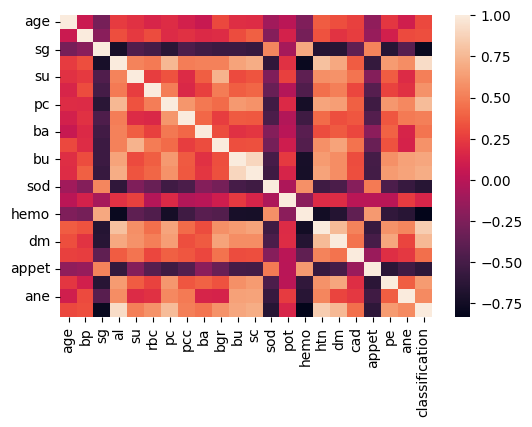

In [85]:
import seaborn as sns
sns.heatmap(df2, annot = False)

Text(0.5, 1.0, 'Feature Importance')

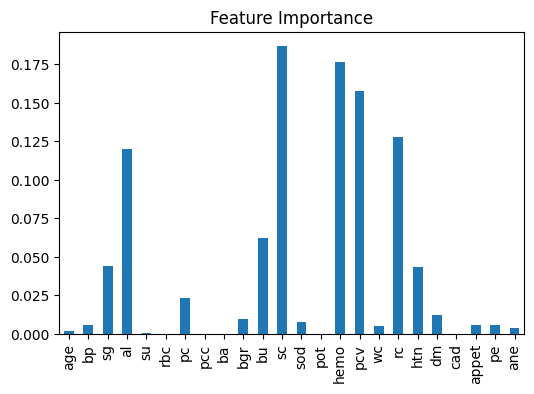

In [108]:
plt.figure()
features = X_test.columns.values.tolist()
importance = model.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

In [109]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))